11501568/11490434 [==============================] - 0s 0us/step


<function matplotlib.pyplot.show>

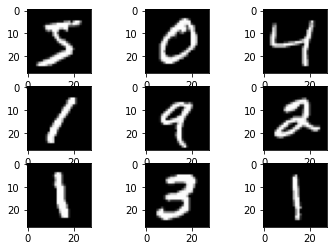

In [ ]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
(xtrain,ytrain),(xtest,ytest)=datasets.mnist.load_data()
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(xtrain[i],cmap = plt.get_cmap('gray'))
plt.show

In [ ]:
from keras.utils import np_utils
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain=xtrain/255.0
xtest=xtest/255.0 
ytrain=np_utils.to_categorical(ytrain,10)
ytest=np_utils.to_categorical(ytest,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1))) 
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)        

In [ ]:
from tensorflow.keras.optimizers import SGD
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=10,batch_size=128,validation_data=(xtest,ytest),verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.1061 - accuracy: 0.9671 - val_loss: 0.0456 - val_accuracy: 0.9851
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.0405 - val_accuracy: 0.9867
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0266 - accuracy: 0.9916 - val_loss: 0.0269 - val_accuracy: 0.9913
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0241 - val_accuracy: 0.9919
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0381 - val_accuracy: 0.9874
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0259 - val_accuracy: 0.992

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


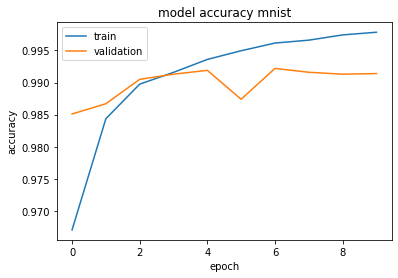

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy mnist')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()